In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask, jsonify 

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, types

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(Measurement.date)).first()
print(most_recent)

('2017-08-23',)


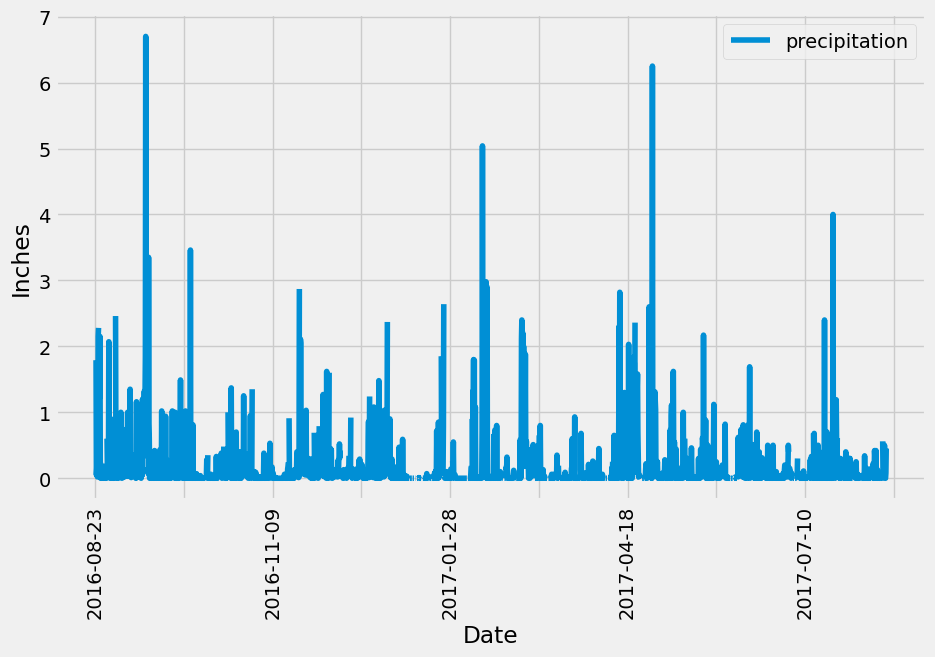

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
earliest = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_precipitation = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= earliest).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_plot_df = pd.DataFrame(year_precipitation, columns=['date', 'precipitation'])
data_plot_df.set_index('date', inplace = True)

# Sort the dataframe by date
data_plot_df = data_plot_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
ax = data_plot_df.plot(figsize=(10,6)) #, x_compat=True)
plt.xticks(rotation = 90)
x_tick_set = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250]
plt.xticks(x_tick_set)
plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_plot_df.describe()

precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()

print(total_stations)

9


In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = sorted(session.query(Measurement.station, func.count(Measurement.station)).\
                         group_by(Measurement.station).all(), key = lambda x: x[1], reverse=True)

print(most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(Measurement.station).filter(Measurement.station == 'USC00519281').with_entities(func.min(Measurement.tobs)).all()[0][0]
highest = session.query(Measurement.station).filter(Measurement.station == 'USC00519281').with_entities(func.max(Measurement.tobs)).all()[0][0]
average = session.query(Measurement.station).filter(Measurement.station == 'USC00519281').with_entities(func.avg(Measurement.tobs)).all()[0][0]
print(f"The lowest temperature recorded was {lowest}. The highest temperature recorded was {highest}. The average temperature was {average}")

The lowest temperature recorded was 54.0. The highest temperature recorded was 85.0. The average temperature was 71.66378066378067


USC00519281


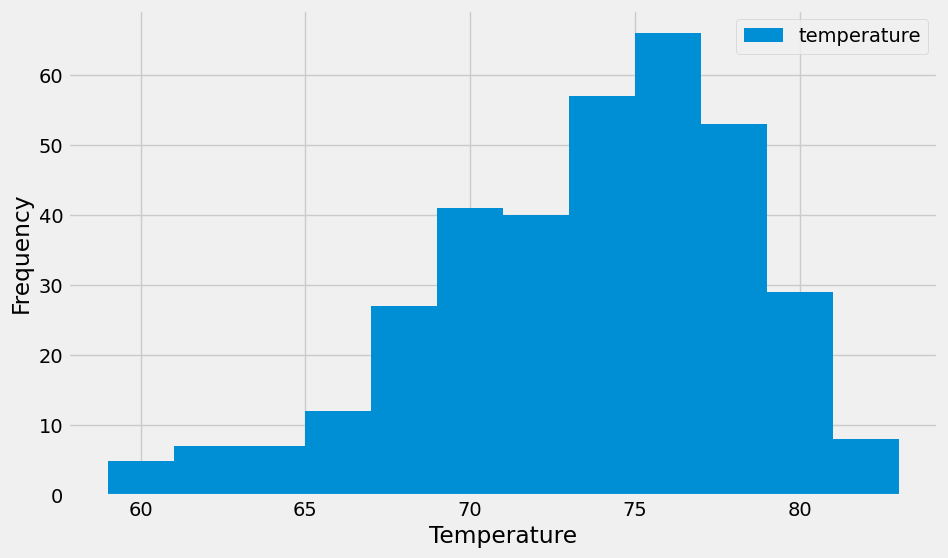

In [27]:
# Using the most active station id
most_active_station_id = most_active_stations[0][0]
print(most_active_station_id)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temperature = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= earliest)\
    .filter(Measurement.station == most_active_station_id).all()

temp_plot_df = pd.DataFrame(year_temperature, columns=['date', 'temperature'])

temp_plot_df.plot.hist(by=None, bins=12, figsize=(10,6))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [28]:
# Close Session
session.close()